In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#On définit les paramètres du système
alpha = 2e-1
beta = 1e-1
gamma = 2e-1
delta = 1e-1

In [4]:
def equa(t, x, y): #equation de Lotka-Volterra
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

# Question 1:
## Signification physique des paramètres:
$\alpha$ est le taux de reproduction des proies : plus il y en a, plus elles se reproduisent.  
$\beta$ est le nombre de proies que chaque prédateur mange à fréquence de temps régulière : plus il est grand, plus les proies diminuent.  
$\gamma$ est le taux de reproduction des prédateurs : plus il y en a, plus il est diificile de chasser et donc de se reproduire.  
$\delta$ est le nombre de proies disponibles par prédateur : plus il est grand, plus les prédateurs se reproduisent. 

## Points d'équilibre:
Pour trouver les points d'équilibre du système, on résout:
$$
\left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = 0 \\
        x_2(\gamma - \delta x_1) = 0 
    \end{array}
\right.
$$
ce qui donne comme solution en particulier le point $(0, 0)$ et l'unique point sur $\mathbb{R_+^*}^2$ : $\bar{x} = $ $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

# Question 2

## Champ de vecteurs

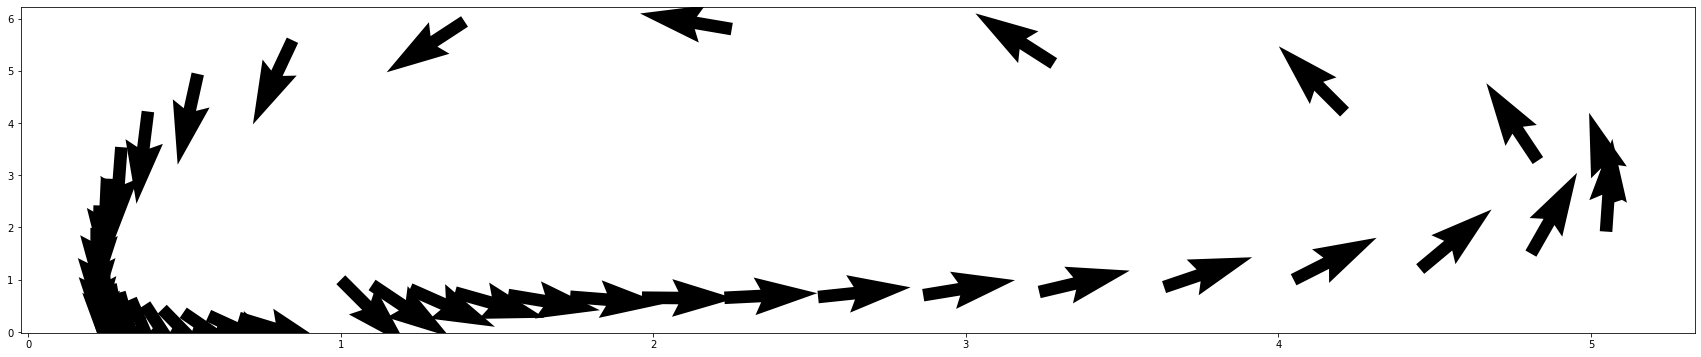

In [5]:
# Dessin du champ de vecteurs issu de l'equation de Lotka-Volterra
plt.figure(figsize=(30, 6))
begin = 1
end = 1
for i in range(40):
    vector_x, vector_y = equa(0, begin, end)
    plt.quiver(begin, end, vector_x, vector_y)
    begin += vector_x
    end += vector_y

## Portrait de phase

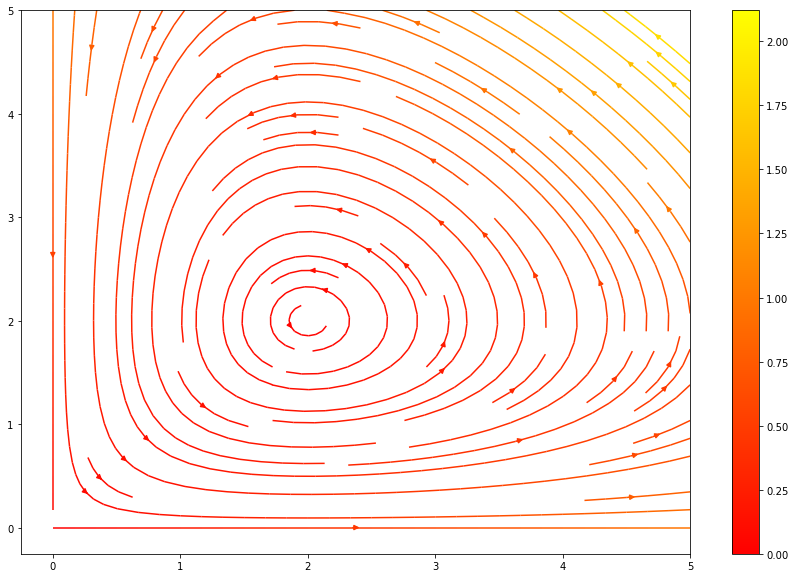

In [11]:
fig = plt.figure(figsize= (15, 10))
Y, X = np.mgrid[0:5:1000j, 0:5:1000j]
U, V = equa(0, X, Y)
# plt.streamplot(X, Y, U, V, density=1, color=U, cmap="autumn")
fig.colorbar(plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap="autumn").lines)

# Question 3

Soit $x_0 = (x_{10}, x_{20}) \in $ et soit x une solution de l'équation de Lokta-Volterratelle que $x(t_0) = x_0$. 
Par le théorème de Cauchy-Lipschitz, le solution maximale de l'équation est unique.  
Supposons qu'il existe $t_1$ tel que $x(t_1)_1 = 0$ et $x(t_1)_2 > 0$.  
La fonction $y(t) = (0, y_2(t))$ où $ \overset{\circ}{y_2} = \gamma y_2  $ et $y(t_1)_2 =  x(t_1)_2$ est solution du problème de Cauchy : 
$$
\left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = \overset{\circ}{x_1} \\
        x_2(\gamma - \delta x_1) = \overset{\circ}{x_2} \\
        x(t_1) = (0, x(t_1)_2)
    \end{array}
\right.
$$
Ainsi par unicité des solutions maximales : $ x = y $ d'où $x_1 = 0$, ce qui est absurde car $x_{10} \neq 0$.  
D'où les solutions de Lokta-Volterra ne peuvent pas couper l'axe des abscisses et de manière symétrique (en appliquant le même raisonnement) l'axe des ordonnées. Ainsi $x$ reste dans le plan R>0*R>0.

# Question 4

In [36]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

Calculons la dérivée de H pour $x = (x_1, x_2)$ une solution de l'équation de Lokta-Volterra initialisée dans $\mathbb{R_+^*}^2$ définie sur un intervalle $I$ de $\mathbb{R}$.  
On a pour tout $t$ $\in$ $I$:
$$
\frac{dH(t)}{dt} = \delta \overset{\circ}{x_1} - \gamma \frac{\overset{\circ}{x_1}}{x_1} + \beta \overset{\circ}{x_2} - \alpha \frac{\overset{\circ}{x_2}}{x_2}
$$

ce qui donne en remplaçant $\overset{\circ}{x}$ et $\overset{\circ}{y}$ par leurs expressions dans l'équation de Lokta-Volterra, 
$$
\frac{dH(t)}{dt} = -\delta x_1(\alpha - \beta x_2) + \gamma (\alpha - \beta x_2) + \beta x_2(\gamma - \delta x_1) - \alpha (\gamma - \delta x_1)
$$
d'où:
$$
\frac{dH(t)}{dt} = 0
$$
H est donc constant sur les solutions de l'équation de Lokta-Volterra.

En déduire que toute solution maximale initialisée dans R_>0×R_>0 est définie sur 
R

# Question 5

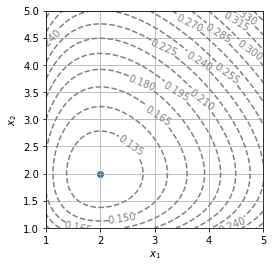

In [38]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(H, np.linspace(1, 5, 1000), np.linspace(1, 5, 1000), 20)
plt.scatter(gamma/delta, alpha/beta)

Par analyse graphique, on conclut que les solutions théoriques de l'équation de Lokta-Volterra sont des ellipsoïdes. On s'attend donc à des solutions périodiques qui ont des tendances prévisibles et oscillatoires qui ne divergent ni ne convergent pas dans le temps. Les ellipsoïdes sont centrés autour du point d'équilibre $\bar{x}$ qui est donc stable. 

# Question 6

In [26]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f(t, *x[:, i])
    return t, x

## Test sur des solutions connus

On commence par tester euler explicite sur l'équation différentielle $\overset{\circ}{x} = x$ dont la solution est la fonction exponentielle.

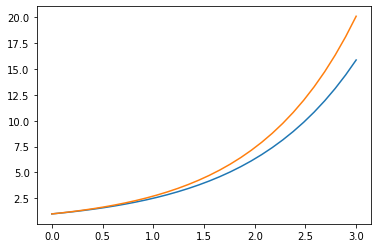

In [27]:
def test(t, x):
    return x

t, x = solve_euler_explicit(test, [1], 1e-1, 0, 3)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.exp(t), label = "solution théorique")

Le résultat est proche de la fonction d'origine et on peut valider euler explicite.

## Question 7

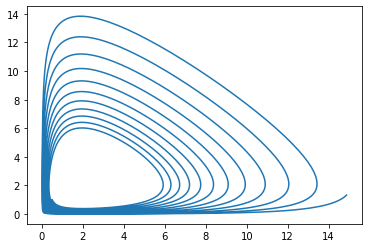

In [28]:
t, x = solve_euler_explicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

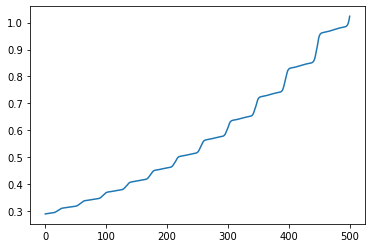

In [29]:
plt.plot(t, H(x[0, :], x[1, :]))

H n'est indéniablement plus constant et diverge vers l'infini en l'infini

Le résultat ne reste pas sur les lignes de niveau de H et diverge. Il n'est plus cohérent avec ce qui est attendu ce qui montre que le schéma d'euler explicite est insuffisant pour modéliser cette équation.

# Question 8

In [31]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        
        def F(x_i):
            return x[:,i] + dt*f(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

## Test sur des solutions connus

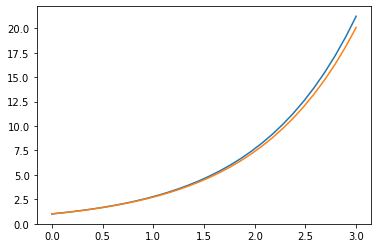

In [32]:
def test(t, x):
    return x

t, x = solve_euler_implicit(test, [1], 1e-1, 0, 3)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.exp(t), label = "solution théorique")

## Test sur Lotka-Volterra

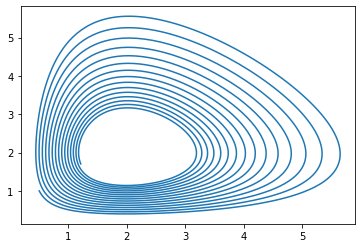

In [34]:
t, x = solve_euler_implicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

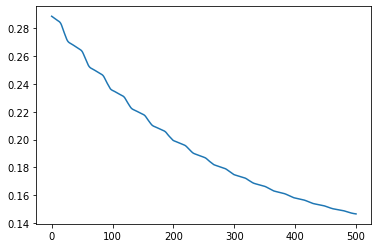

In [35]:
plt.plot(t, H(x[0, :], x[1, :]))

H n'est pas constant non plus car décroissant et tend vers 0 en temps infini. La solution tend vers le point d'équilibre stable $\bar{x}$.
Le schéma d'euler implicite n'est pas suffisant pour modéliser le système.

# Question 9

# Question 10

# Question 11